In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import skimage.io
import os

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
WINNERS = [7193229, 7215993, 7199273, "cellprofiler"]
THRESHOLD = 0.7
METRIC = "F1"

# Load submission results

In [4]:
data_dir = "/storage/data/DSB2018/"

submissions = pd.read_csv(data_dir + "metadata/submissions.csv")

image_groups = pd.read_csv(data_dir + "metadata/image_groups_defined_by_beth.csv")
image_groups.loc[image_groups.Group == "PinkAndPurple", "Group"] = "RinkAndPurple"

accuracy = pd.read_csv(data_dir + "results/accuracy.csv")

false_negatives = pd.read_csv(data_dir + "results/false_negatives.csv")

splits_merges = pd.read_csv(data_dir + "results/splits_merges.csv")

In [5]:
average_f1 = accuracy.groupby("SubmissionID").mean().reset_index()

average_f1 = pd.merge(submissions, average_f1, left_on="id", right_on="SubmissionID")

print("Submissions with parsing problems:", len(average_f1[average_f1["F1"] == 0].SubmissionID))

average_f1 = average_f1[average_f1["F1"] > 0]

Submissions with parsing problems: 24


# Load CellProfiler results

In [6]:
cp_accuracy = pd.read_csv(data_dir + "results/cp_accuracy.csv")

cp_false_negatives = pd.read_csv(data_dir + "results/cp_false_negatives.csv")

cp_splits_merges = pd.read_csv(data_dir + "results/cp_splits_merges.csv")

# Compare official score to F1

/home/jccaicedo/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


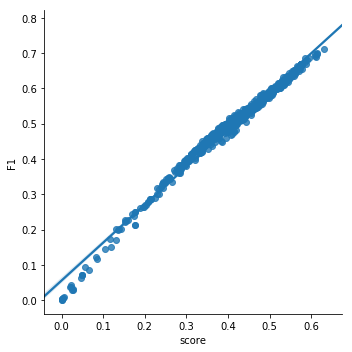

In [7]:
sb.lmplot(data=average_f1, x="score", y="F1", fit_reg=True)

# Distribution of F1 and scores

/home/jccaicedo/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


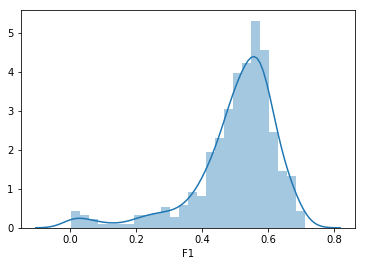

In [8]:
sb.distplot(average_f1["F1"])

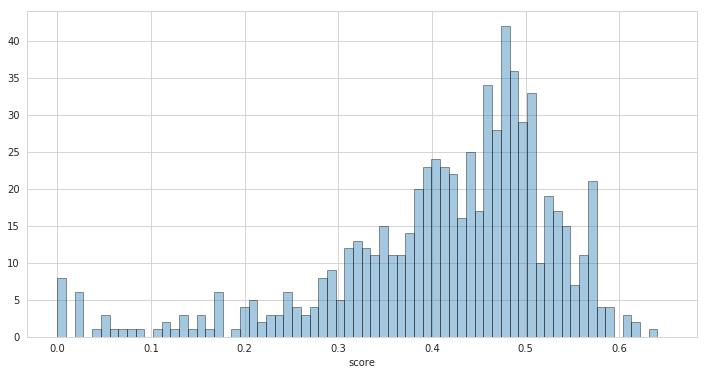

In [9]:
plt.figure(figsize=(12,6))
sb.set_style("whitegrid")

#sb.set_style("darkgrid", {"axes.facecolor": ".9"})
sb.distplot(
    average_f1["score"], 
    bins=70, 
    kde=False,
    hist_kws={"range": [0.0,0.65], "edgecolor":"k", "linewidth":1, "rwidth":1.0},
    kde_kws={"color": "k", "lw": 0.5}
)

In [10]:
max_score = average_f1["score"].max()
median_score = average_f1["score"].median()
mean_score = average_f1["score"].mean()
top5_diff = average_f1.loc[0, "score"] - average_f1.loc[4, "score"]
print(f"Max: {max_score}, Median: {median_score}, Mean: {mean_score}, Top 5 diff: {top5_diff}")
average_f1.sort_values(by=["score"], ascending=False)


Max: 0.631646, Median: 0.44295299999999993, Mean: 0.4150704411906158, Top 5 diff: 0.02235100000000001


,filename,id,score,team,SubmissionID,F1,FN,FP,Jaccard,Official_Score,Precision,Recall,TP,Threshold
0,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,7193229,0.711952,12.201887,9.456604,0.822865,0.631433,0.740022,0.700690,22.864151,0.725
2,sub-scale3.csv,7215993,0.614730,jacobkie,7215993,0.698661,15.330189,9.783019,0.831992,0.614532,0.737879,0.674547,19.735849,0.725
1,stage2_sub_003b_20180409T01434.csv,7199273,0.614046,Deep Retina,7199273,0.700783,15.498113,8.120755,0.804857,0.613829,0.733838,0.683306,19.567925,0.725
3,sub_2.csv,7202106,0.610883,Nuclear Vision,7202106,0.689498,12.556604,8.009434,0.787119,0.610668,0.723542,0.667909,22.509434,0.725
4,stage2_submission.csv,7198739,0.609295,Inom Mirzaev,7198739,0.698194,15.391509,8.438679,0.811465,0.609081,0.732259,0.683152,19.674528,0.725
6,1_aug_gray_1_5_1_stage_2_v1__23999_thresh_15_0...,7199730,0.608128,Gangadhar Payyavula,7199730,0.691133,15.887736,10.821698,0.810386,0.607955,0.713760,0.678911,19.178302,0.725
5,sub_stage2.csv,7211410,0.594075,ACS,7211410,0.685757,14.508491,12.357547,0.817278,0.593829,0.734083,0.656499,20.557547,0.725
7,final-0.6.csv,7194952,0.590253,ZhengLi,7194952,0.679453,16.264151,9.849057,0.803629,0.590002,0.713016,0.657801,18.801887,0.725
8,submission_v1.csv,7206692,0.588339,Yuanfang Guan and Wei Dong,7206692,0.668596,17.453774,10.783962,0.813639,0.588104,0.703921,0.645910,17.612264,0.725
25,stage2_init.csv,7185524,0.585559,Two Masketeers,7185524,0.684773,14.745283,9.141509,0.769040,0.585322,0.697474,0.713824,20.320755,0.725


# Change in ranking

In [11]:
r = 0
average_f1["F1_ranking"] = 0
for k in average_f1.sort_values(by="F1", ascending=False).itertuples():
    average_f1.loc[k.Index, "F1_ranking"] = r
    r += 1
    
r = 0
average_f1["score_ranking"] = 0
for k in average_f1.sort_values(by="score", ascending=False).itertuples():
    average_f1.loc[k.Index, "score_ranking"] = r
    r += 1
    
average_f1["Dropped"] = average_f1["F1_ranking"] > average_f1["score_ranking"]

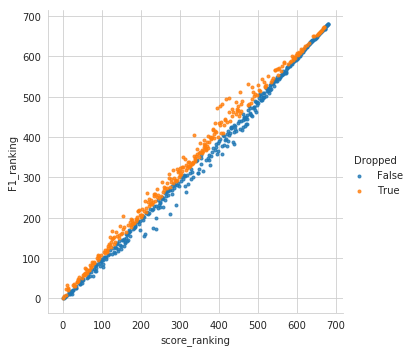

In [12]:
sb.lmplot(data=average_f1, x="score_ranking", y="F1_ranking", fit_reg=False, markers=".", hue="Dropped")

# CellProfiler metrics

In [13]:
cp_accuracy.mean() #.groupby(["Threshold"]).mean()

Threshold          0.725000
F1                 0.628041
Jaccard            0.740860
TP                17.055660
FP                17.623585
FN                18.010377
Official_Score     0.528076
Precision          0.637987
Recall             0.639619
dtype: float64

In [14]:
average_f1[average_f1["score"] > 0.528].sort_values(by=["score_ranking"], ascending=True)

,filename,id,score,team,SubmissionID,F1,FN,FP,Jaccard,Official_Score,Precision,Recall,TP,Threshold,F1_ranking,score_ranking,Dropped
0,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,7193229,0.711952,12.201887,9.456604,0.822865,0.631433,0.740022,0.700690,22.864151,0.725,0,0,False
2,sub-scale3.csv,7215993,0.614730,jacobkie,7215993,0.698661,15.330189,9.783019,0.831992,0.614532,0.737879,0.674547,19.735849,0.725,2,1,True
1,stage2_sub_003b_20180409T01434.csv,7199273,0.614046,Deep Retina,7199273,0.700783,15.498113,8.120755,0.804857,0.613829,0.733838,0.683306,19.567925,0.725,1,2,False
3,sub_2.csv,7202106,0.610883,Nuclear Vision,7202106,0.689498,12.556604,8.009434,0.787119,0.610668,0.723542,0.667909,22.509434,0.725,5,3,True
4,stage2_submission.csv,7198739,0.609295,Inom Mirzaev,7198739,0.698194,15.391509,8.438679,0.811465,0.609081,0.732259,0.683152,19.674528,0.725,3,4,False
6,1_aug_gray_1_5_1_stage_2_v1__23999_thresh_15_0...,7199730,0.608128,Gangadhar Payyavula,7199730,0.691133,15.887736,10.821698,0.810386,0.607955,0.713760,0.678911,19.178302,0.725,4,5,False
5,sub_stage2.csv,7211410,0.594075,ACS,7211410,0.685757,14.508491,12.357547,0.817278,0.593829,0.734083,0.656499,20.557547,0.725,6,6,False
7,final-0.6.csv,7194952,0.590253,ZhengLi,7194952,0.679453,16.264151,9.849057,0.803629,0.590002,0.713016,0.657801,18.801887,0.725,8,7,True
8,submission_v1.csv,7206692,0.588339,Yuanfang Guan and Wei Dong,7206692,0.668596,17.453774,10.783962,0.813639,0.588104,0.703921,0.645910,17.612264,0.725,23,8,True
25,stage2_init.csv,7185524,0.585559,Two Masketeers,7185524,0.684773,14.745283,9.141509,0.769040,0.585322,0.697474,0.713824,20.320755,0.725,7,9,False


# Average accuracy by image type

In [15]:
cp_accuracy["team"] = "CellProfiler"
top_groups = pd.concat([accuracy, cp_accuracy])
top_groups = pd.merge(top_groups, image_groups, on="Image")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [16]:
imgrp_results = pd.merge(accuracy, image_groups, on="Image")
#f1_x_group = imgrp_results[ imgrp_results["Threshold"].round(decimals=2) == THRESHOLD ].groupby(["SubmissionID", "Group"]).mean()[[METRIC]].reset_index()
f1_x_group = top_groups[ top_groups["Threshold"].round(decimals=2) == THRESHOLD ].groupby(["SubmissionID", "Group"]).mean()[[METRIC]].reset_index()
palette=["xkcd:gray", "xkcd:violet", "violet", "xkcd:azure", "xkcd:green", "xkcd:black"]

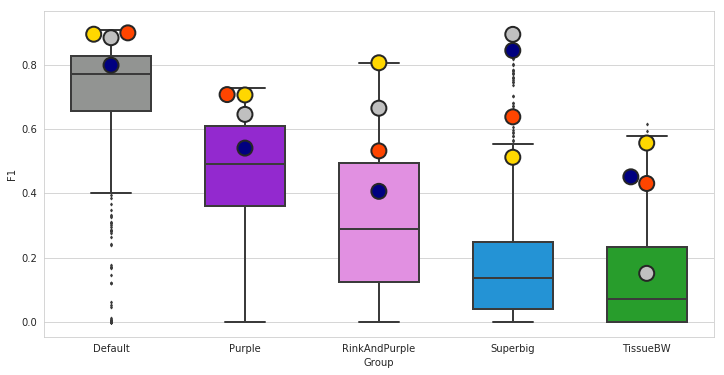

In [17]:
plt.figure(figsize=(12,6))
ax = sb.swarmplot(data=f1_x_group[f1_x_group.SubmissionID.isin(WINNERS)], x="Group", y=METRIC, palette=["gold", "orangered", "silver", "navy"], size=15, linewidth=2, hue="SubmissionID")
ax.legend_.remove()
sb.boxplot(data=f1_x_group, x="Group", y=METRIC, palette=palette, linewidth=2, width=0.6, fliersize=2)

In [18]:
len(f1_x_group)/5

707.0

# Error counts

In [19]:
# Count total number of true objects
image_groups["Objects"] = 0
for i,r in image_groups.iterrows():
    im = skimage.io.imread("/storage/data/DSB2018/phase-2-gt/" + r.Image + ".png")
    image_groups.loc[i, "Objects"] = len(np.unique(im)) - 1
    
true_objects = image_groups.groupby("Group")["Objects"].sum()
true_objects.sum()

3717

In [20]:
all_submissions = submissions.append({"filename":"cppipe", "id":"cellprofiler", "score":0.5, "team":"CellProfiler"}, ignore_index=True)

counts_x_group = top_groups[ top_groups["Threshold"].round(decimals=2) == THRESHOLD ].groupby(["SubmissionID", "Group"]).sum()[["TP", "FP", "FN"]].reset_index()
counts_x_group = pd.merge(counts_x_group, all_submissions, left_on="SubmissionID", right_on="id")
counts_x_group = counts_x_group[counts_x_group["SubmissionID"].isin(WINNERS)]

counts_x_group["order"] = 0
counts_x_group.loc[counts_x_group.id == 7193229, "order"] = 1
counts_x_group.loc[counts_x_group.id == 7215993, "order"] = 2
counts_x_group.loc[counts_x_group.id == 7199273, "order"] = 3
counts_x_group.loc[counts_x_group.id == "cellprofiler", "order"] = 4

counts_x_group = counts_x_group.sort_values("order")

In [21]:
for k in counts_x_group.SubmissionID.unique():
    idx = counts_x_group.loc[counts_x_group.SubmissionID == k].index[0]
    dup = dict( counts_x_group.loc[idx] )
    dup["Group"] = "Total"
    
    dup["TP"] = counts_x_group[counts_x_group["SubmissionID"] == k].TP.sum()
    dup["FP"] = counts_x_group[counts_x_group["SubmissionID"] == k].FP.sum()
    dup["FN"] = counts_x_group[counts_x_group["SubmissionID"] == k].FN.sum()
    
    counts_x_group = counts_x_group.append(dup , ignore_index=True )
    
counts_x_group

,SubmissionID,Group,TP,FP,FN,filename,id,score,team,order
0,7193229,Default,1570,186,209,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
1,7193229,Purple,750,238,402,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
2,7193229,RinkAndPurple,495,86,147,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
3,7193229,Superbig,21,12,15,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
4,7193229,TissueBW,49,19,59,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
5,7215993,TissueBW,9,2,99,sub-scale3.csv,7215993,0.614730,jacobkie,2
6,7215993,Superbig,30,4,6,sub-scale3.csv,7215993,0.614730,jacobkie,2
7,7215993,RinkAndPurple,387,145,255,sub-scale3.csv,7215993,0.614730,jacobkie,2
8,7215993,Purple,660,245,492,sub-scale3.csv,7215993,0.614730,jacobkie,2
9,7215993,Default,1484,163,295,sub-scale3.csv,7215993,0.614730,jacobkie,2


In [22]:
# Normalize counts with respect to real objects

for k in counts_x_group["Group"].unique():
    if k == "Total":
        counts_x_group.loc[counts_x_group["Group"] == k, ["TP", "FP", "FN"]] /= true_objects.sum()
    else:
        counts_x_group.loc[counts_x_group["Group"] == k, ["TP", "FP", "FN"]] /= true_objects[k]
    
counts_x_group

,SubmissionID,Group,TP,FP,FN,filename,id,score,team,order
0,7193229,Default,0.882518,0.104553,0.117482,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
1,7193229,Purple,0.651042,0.206597,0.348958,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
2,7193229,RinkAndPurple,0.771028,0.133956,0.228972,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
3,7193229,Superbig,0.583333,0.333333,0.416667,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
4,7193229,TissueBW,0.453704,0.175926,0.546296,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
5,7215993,TissueBW,0.083333,0.018519,0.916667,sub-scale3.csv,7215993,0.614730,jacobkie,2
6,7215993,Superbig,0.833333,0.111111,0.166667,sub-scale3.csv,7215993,0.614730,jacobkie,2
7,7215993,RinkAndPurple,0.602804,0.225857,0.397196,sub-scale3.csv,7215993,0.614730,jacobkie,2
8,7215993,Purple,0.572917,0.212674,0.427083,sub-scale3.csv,7215993,0.614730,jacobkie,2
9,7215993,Default,0.834177,0.091625,0.165823,sub-scale3.csv,7215993,0.614730,jacobkie,2


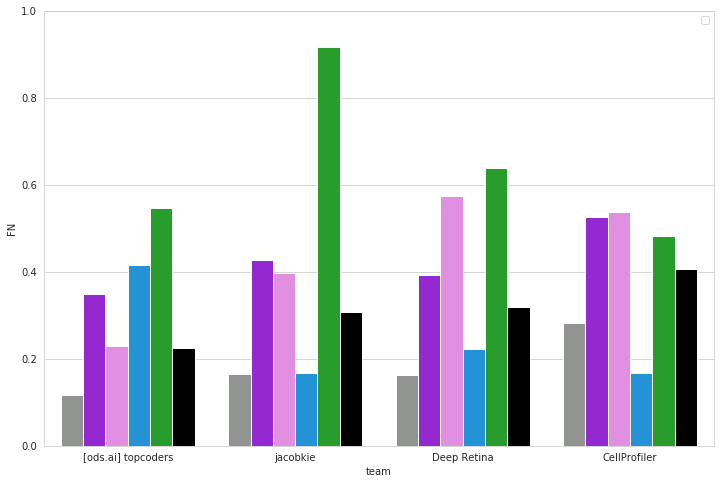

In [23]:
plt.figure(figsize=(12,8))
#sb.barplot(data=counts_x_group.groupby("team").sum().reset_index().sort_values("order"), x="team", y="FN", ci=None, alpha=0.3)
g = sb.barplot(data=counts_x_group, x="team", y="FN", ci=None, hue="Group", palette=palette)
g.set(ylim=(0, 1))
plt.legend("")

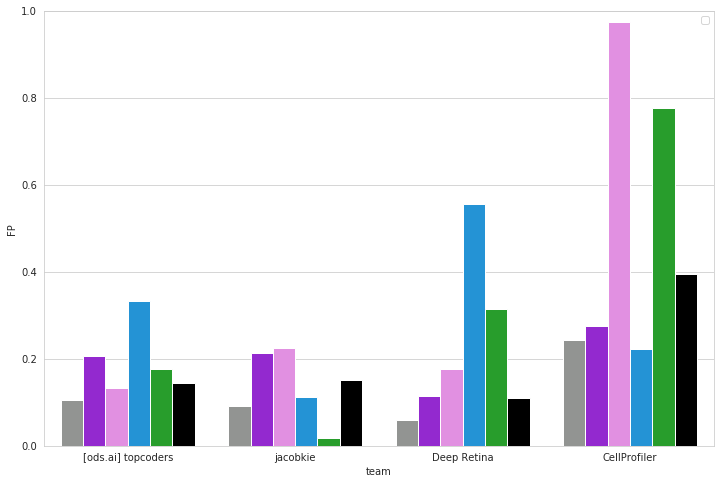

In [24]:
plt.figure(figsize=(12,8))
#sb.barplot(data=counts_x_group.groupby("team").sum().reset_index().sort_values("order"), x="team", y="FP", ci=None, alpha=0.3)
g = sb.barplot(data=counts_x_group, x="team", y="FP", ci=None, hue="Group", palette=palette)
g.set(ylim=(0, 1.0))
plt.legend("")

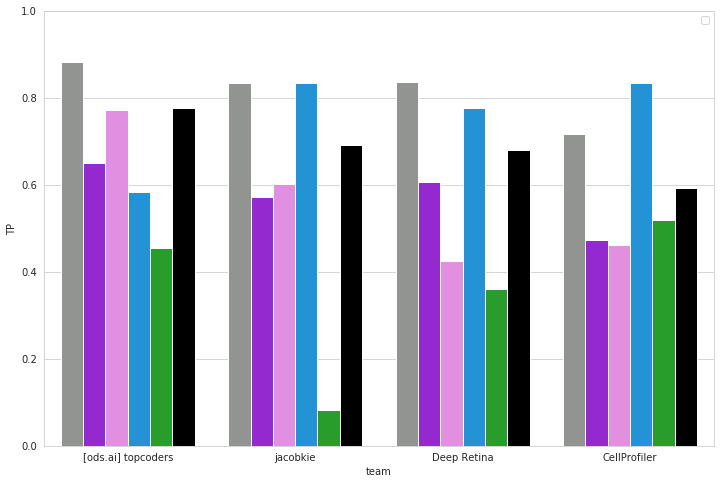

In [25]:
plt.figure(figsize=(12,8))
#sb.barplot(data=counts_x_group.groupby("team").sum().reset_index().sort_values("order"), x="team", y="FP", ci=None, alpha=0.3)
g = sb.barplot(data=counts_x_group, x="team", y="TP", ci=None, hue="Group", palette=palette)
g.set(ylim=(0, 1))
plt.legend("")

In [26]:
f1_x_group.groupby("Group")[METRIC].median()

Group
Default          0.773081
Purple           0.490640
RinkAndPurple    0.288484
Superbig         0.137566
TissueBW         0.072464
Name: F1, dtype: float64

In [27]:
f1_x_group[f1_x_group.SubmissionID.isin(WINNERS)].groupby(["Group", "SubmissionID"]).mean()

F1
Group         SubmissionID          
Default       7193229       0.895334
              7199273       0.899576
              7215993       0.884470
              cellprofiler  0.798873
Purple        7193229       0.706382
              7199273       0.707536
              7215993       0.645908
              cellprofiler  0.541012
RinkAndPurple 7193229       0.806486
              7199273       0.532325
              7215993       0.665155
              cellprofiler  0.406499
Superbig      7193229       0.512500
              7199273       0.638227
              7215993       0.894841
              cellprofiler  0.844841
TissueBW      7193229       0.556818
              7199273       0.430939
              7215993       0.151261
              cellprofiler  0.451613

In [28]:
X = top_groups[top_groups.SubmissionID.isin(WINNERS)]
X = X.groupby(["SubmissionID","Threshold"]).mean().sort_values("Official_Score", ascending=False).reset_index()
X = X[X.SubmissionID.isin(WINNERS)]
X["Threshold"] = pd.to_numeric(X["Threshold"].round(decimals=2))

Y = top_groups[top_groups.Threshold.round(decimals=2)==THRESHOLD].groupby("SubmissionID").mean().sort_values("Official_Score", ascending=False).reset_index()
Y[Y.SubmissionID.isin(WINNERS)]

,SubmissionID,F1,FN,FP,Jaccard,Official_Score,Precision,Recall,TP,Threshold
0,7215993,0.832373,10.820755,5.273585,0.831992,0.742691,0.880167,0.803601,24.245283,0.7
2,7193229,0.816089,7.849057,5.103774,0.822865,0.736997,0.849151,0.802411,27.216981,0.7
3,7199273,0.819258,11.198113,3.820755,0.804857,0.730776,0.860112,0.797884,23.867925,0.7
91,cellprofiler,0.743370,14.254717,13.867925,0.740860,0.633348,0.756516,0.755256,20.811321,0.7


In [29]:
total = 0
path = "/storage/data/DSB2018/phase-2-gt/"
phase2 = os.listdir(path)
for im in phase2:
    image = skimage.io.imread(path + im)
    total += len(np.unique(image))
print(total)

3823


/home/jccaicedo/.local/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.4, 1)

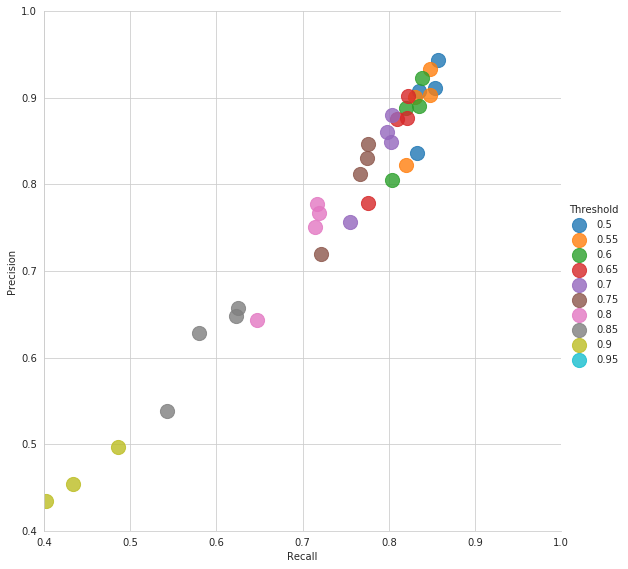

In [30]:
plt.figure(figsize=(10,10))

pr_plot = sb.lmplot(data=X, x="Recall", y="Precision", hue="Threshold", fit_reg=False, size=8, scatter_kws={"s": 200})
pr_plot.axes[0,0].set_ylim(0.4,1)
pr_plot.axes[0,0].set_xlim(0.4,1)

/home/jccaicedo/.local/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.4, 1)

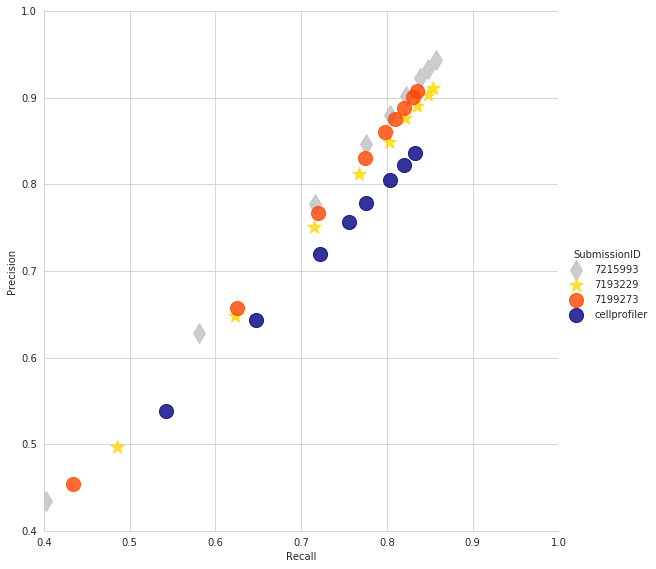

In [31]:
plt.figure(figsize=(10,10))

pr_plot = sb.lmplot(data=X, x="Recall", y="Precision", 
                    hue="SubmissionID", markers=["d","*","o", "o"],
                    fit_reg=False, size=8, scatter_kws={"s": 200},
                    palette=["silver", "gold", "orangered", "navy"]
                   )
pr_plot.axes[0,0].set_ylim(0.4,1)
pr_plot.axes[0,0].set_xlim(0.4,1)
#29: [ods.ai] topcoders
#93: jacobkie
#73: Deep Retina

(0, 1)

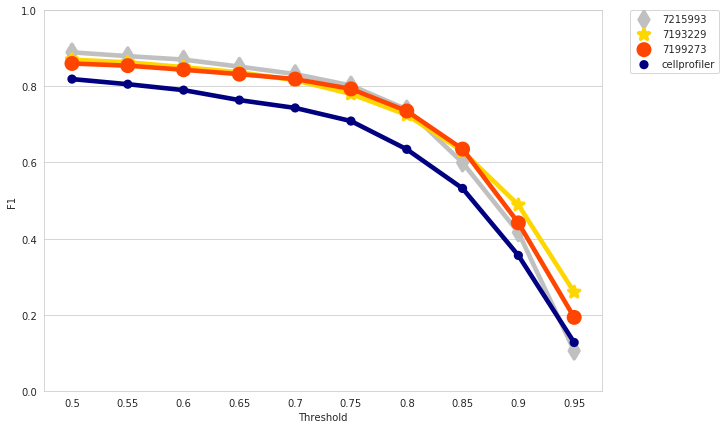

In [32]:
sb.set_style("whitegrid")
plt.figure(figsize=(10,7))
f1_plot = sb.pointplot(data=X, x="Threshold", y="F1", 
                    hue="SubmissionID", markers=["d","*","o", "."],
                    fit_reg=False, size=8, scatter_kws={"s": 200},
                    palette=["silver", "gold", "orangered", "navy"], scale=1.7
                   )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f1_plot.axes.set_ylim(0,1)
#f1_plot.axes.set_xlim(0.5,1)
#29: [ods.ai] topcoders
#93: jacobkie
#73: Deep Retina

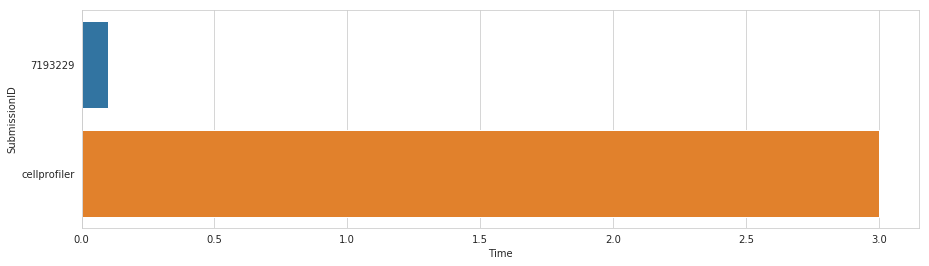

In [40]:
time_groups = top_groups.copy()
time_groups["Time"] = 0
time_groups.loc[time_groups.SubmissionID == WINNERS[0], "Time"] = 0.1
time_groups.loc[time_groups.SubmissionID == WINNERS[1], "Time"] = 12
time_groups.loc[time_groups.SubmissionID == WINNERS[2], "Time"] = 24
time_groups.loc[time_groups.SubmissionID == WINNERS[3], "Time"] = 3

single_groups = time_groups[(time_groups.Threshold.round(decimals=2) == THRESHOLD) & (top_groups.SubmissionID.isin(WINNERS))].groupby(["SubmissionID"]).mean().reset_index()

plt.figure(figsize=(15,4))
sb.barplot(data=single_groups[single_groups["SubmissionID"].isin(["cellprofiler", 7193229])], x="Time", y="SubmissionID")

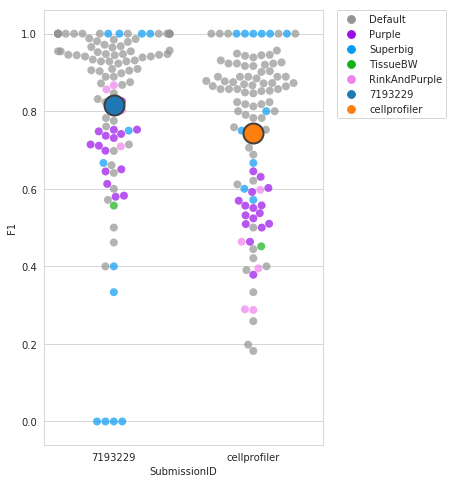

In [45]:
single_imgs = top_groups[(top_groups.Threshold.round(decimals=2) == THRESHOLD) & (top_groups.SubmissionID.isin(WINNERS))].groupby(["SubmissionID", "Image", "Group"]).mean().reset_index()
plt.figure(figsize=(5,8))
sb.swarmplot(
    data=single_imgs[single_imgs["SubmissionID"].isin(["cellprofiler", 7193229])], 
    y="F1", 
    x="SubmissionID", 
    hue="Group", 
    palette=["xkcd:gray", "xkcd:violet", "xkcd:azure", "xkcd:green", "violet", "xkcd:black"],
    size=8, linewidth=0, alpha=0.7
)

ax = sb.swarmplot(data=single_groups[single_groups["SubmissionID"].isin(["cellprofiler", 7193229])], x="SubmissionID", y=METRIC, size=20, linewidth=2, hue="SubmissionID")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [46]:
single_groups

,SubmissionID,F1,FN,FP,Jaccard,Official_Score,Precision,Recall,TP,Threshold,Time
0,7193229,0.816089,7.849057,5.103774,0.822865,0.736997,0.849151,0.802411,27.216981,0.7,0.1
1,7199273,0.819258,11.198113,3.820755,0.804857,0.730776,0.860112,0.797884,23.867925,0.7,24.0
2,7215993,0.832373,10.820755,5.273585,0.831992,0.742691,0.880167,0.803601,24.245283,0.7,12.0
3,cellprofiler,0.743370,14.254717,13.867925,0.740860,0.633348,0.756516,0.755256,20.811321,0.7,3.0
